# Mandelonitrile [M+H]+ for AMBER, RDKit, and DFT geometry optimized conformers, Monte Carlo convergence and CCS vs energy

In [1]:
import matplotlib.pyplot as plt
import glob
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import os
from os.path import *
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import NullFormatter
from scipy.stats import gaussian_kde

In /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
molids = ['10_rdkit']
names = ['Mandelonitrile']
adducts = ['+H']

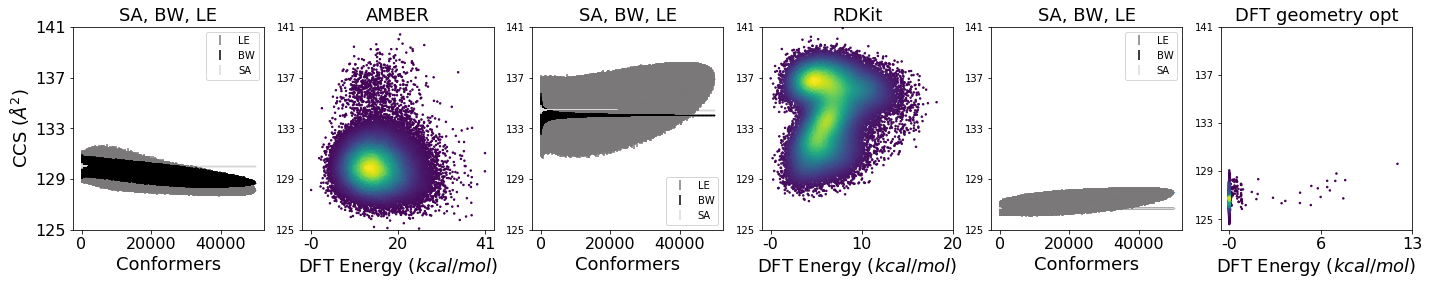

In [3]:
N = 50000

for i, ID in enumerate(['10']):
    
    # Pre-define x and y values for rdkit energy v ccs plot so we can use y for the y axis limits.  
    
    # Set the minimum energy to 0 and scale the rest accordingly.
    e2df = pd.read_csv(f'../data/molid{ID}_rdkit_ccs.csv')     
    e2df['dft_energy'] *= 627.509 # Convert hartree to kcal/mol 
    e2df['dft_energy'] -= e2df['dft_energy'].min()
    x2 = e2df['dft_energy']
    y2 = e2df['ccs']
    
    

    # Set the minimum energy to 0 and scale the rest accordingly.
    e3df = pd.read_csv(f'../data/molid{ID}_dgo_ccs.csv')      
    e3df['dft_energy'] *= 627.509 # Convert hartree to kcal/mol 
    e3df['dft_energy'] -= e3df['dft_energy'].min()
    x3 = e3df['dft_energy']
    y3 = e3df['ccs']

    
    
    # Set global figure
    plt.figure(figsize=(24,4))
    #ytic = np.linspace(ymin-0.1, ymax+0.1, 5)
    
    ####------------
    # Plot CCS vs DFT energy. We plot this first in the script so we
     # can grab the y axis limits
    ax2 = plt.subplot(1,6,2)
    edf = pd.read_csv(f'../data/molid{ID}_ccs.csv')   
    
    # Set the minimum energy to 0 and scale the rest accordingly.
    # Comment these out to restore specific DFT energy values
    # Which apparently is meaningless to compare to each other
    edf['dft_energy'] *= 627.509 # Convert hartree to kcal/mol 
    edf['dft_energy'] -= edf['dft_energy'].min()
    
    # Generate color by density
    x = edf['dft_energy']
    y = edf['ccs']
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    #z = 'black'

    plt.scatter(x, y, c=z, s=2.2)
    #plt.ylim(ymin, ymax)
    plt.xlabel('DFT Energy $\it{(kcal/mol)}$', fontsize=18)
    #plt.title(f'{names[i]} [M{adducts[i]}]$^{adducts[i][0]}$', fontsize=18)
    plt.title('AMBER', fontsize=18)
    plt.tick_params(axis='x', which='major', labelsize=16)
    
    xtic = np.linspace(np.min(x)-0.01, np.max(x)+0.01, 3)
    ax2.xaxis.set_major_formatter(FormatStrFormatter('%0.0f'))
    ax2.set_xticks(xtic)   
    
    # Define the y limits, using y2 pre-defined earlier
    ymin = np.min([y.min(), y2.min()])
    ymax = np.max([y.max(), y2.max()])
    ytic = np.linspace(ymin-0.1, ymax+0.1, 5)
    plt.ylim(ymin, ymax)
    ax2.set_yticks(ytic)
    ax2.yaxis.set_major_formatter(FormatStrFormatter('%0.0f'))      
    
    ####------------
    # Plot BW, LE, SA on AMBER
    ax1 = plt.subplot(1,6,1)
    techdf = pd.read_csv(f'../data/MC-ccs-results/molid{ID}_MC_ccs_iter1000.csv')
    
    nlst = techdf['nlst']
    plt.scatter(nlst, techdf['Lowest Energy CCS'], s=.1, label=None)
    plt.errorbar(nlst, techdf['Lowest Energy CCS'], yerr=techdf['lec std'],
                 fmt='none', ecolor='#7a7878', label='LE') #545454

    plt.scatter(nlst, techdf['Boltzmann Weighted'], s=.1, c='#000000', label=None)
    plt.errorbar(nlst, techdf['Boltzmann Weighted'], yerr=techdf['bw std'],
                 fmt='none', ecolor='#000000', label='BW')

    plt.scatter(nlst, techdf['Simple Ave'], s=.1, c='#d9d9d9', label=None)
    plt.errorbar(nlst, techdf['Simple Ave'], yerr=techdf['sa std'], 
                 fmt='none', ecolor='#d9d9d9', label='SA') #7a7878
    
    # Set y axis again
    plt.ylim(ymin, ymax)
    plt.xlabel('Conformers', fontsize=18)
    plt.ylabel('CCS ($\AA^2$)', fontsize=18)
    #plt.title(f'{names[i]}, molid{ID}')
    plt.title('SA, BW, LE', fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.legend()
    
    ax1.set_yticks(ytic)
    ax1.yaxis.set_major_formatter(FormatStrFormatter('%0.0f'))     
    
    
    ####------------
    # Plot BW, LE, SA on RDKit
    ax3 = plt.subplot(1,6,3)
    techdf = pd.read_csv(f'../data/MC-ccs-results/molid{ID}_rdkit_MC_ccs_iter1000.csv')
    
    nlst = techdf['nlst']
    plt.scatter(nlst, techdf['Lowest Energy CCS'], s=.1, label=None)
    plt.errorbar(nlst, techdf['Lowest Energy CCS'], yerr=techdf['lec std'],
                 fmt='none', ecolor='#7a7878', label='LE') #545454

    plt.scatter(nlst, techdf['Boltzmann Weighted'], s=.1, c='#000000', label=None)
    plt.errorbar(nlst, techdf['Boltzmann Weighted'], yerr=techdf['bw std'],
                 fmt='none', ecolor='#000000', label='BW')

    plt.scatter(nlst, techdf['Simple Ave'], s=.1, c='#d9d9d9', label=None)
    plt.errorbar(nlst, techdf['Simple Ave'], yerr=techdf['sa std'], 
                 fmt='none', ecolor='#d9d9d9', label='SA') #7a7878
    
    # Set y axis again
    plt.ylim(ymin, ymax)
    plt.xlabel('Conformers', fontsize=18)
    #plt.title(f'{names[i]}, molid{ID}')
    plt.title('SA, BW, LE', fontsize=18)
    plt.tick_params(axis='x', which='major', labelsize=16)
    plt.legend(loc='lower right')    
    
    ax3.set_yticks(ytic)
    ax3.yaxis.set_major_formatter(FormatStrFormatter('%0.0f'))     
        
    ####------------
    # Plot CCS vs DFT energy for RDKit
    ax4 = plt.subplot(1,6,4)
    
    xy2 = np.vstack([x2,y2])
    z = gaussian_kde(xy2)(xy2)
    #z = 'black'

    plt.scatter(x2, y2, c=z, s=2.2)
    plt.ylim(ymin, ymax)
    plt.xlabel('DFT Energy $\it{(kcal/mol)}$', fontsize=18)
    plt.title('RDKit', fontsize=18)
    plt.tick_params(axis='x', which='major', labelsize=16)
    
    
    # Force set to x lim max to 20 get a better look at the graph since there are 3
     # rogue conformers with extraoridnarly high energy skewing our view
    ax4.set_xlim((np.min(x2)-1, 20)) 
    xtic = np.linspace(np.min(x2)-0.01, 20, 3) #np.max(x2)+0.01, 3)    
    ax4.set_xticks(xtic)  
    ax4.xaxis.set_major_formatter(FormatStrFormatter('%0.0f'))    
    ax4.set_yticks(ytic)
    ax4.yaxis.set_major_formatter(FormatStrFormatter('%0.0f')) 
    
    
    ####------------
    # Plot BW, LE, SA on DFT-GO
    ax5 = plt.subplot(1,6,5)
    techdf = pd.read_csv(f'../data/MC-ccs-results/molid{ID}_dgo_MC_ccs_iter1000.csv')
    
    nlst = techdf['nlst']
    plt.scatter(nlst, techdf['Lowest Energy CCS'], s=.1, label=None)
    plt.errorbar(nlst, techdf['Lowest Energy CCS'], yerr=techdf['lec std'],
                 fmt='none', ecolor='#7a7878', label='LE')

    plt.scatter(nlst, techdf['Boltzmann Weighted'], s=.1, c='#000000', label=None)
    plt.errorbar(nlst, techdf['Boltzmann Weighted'], yerr=techdf['bw std'],
                 fmt='none', ecolor='#000000', label='BW')

    plt.scatter(nlst, techdf['Simple Ave'], s=.1, c='#d9d9d9', label=None)
    plt.errorbar(nlst, techdf['Simple Ave'], yerr=techdf['sa std'], 
                 fmt='none', ecolor='#d9d9d9', label='SA')
    
    # Set y axis again
    plt.ylim(ymin, ymax)
    plt.xlabel('Conformers', fontsize=18)
    plt.title('SA, BW, LE', fontsize=18)
    plt.tick_params(axis='x', which='major', labelsize=16)
    plt.legend()    
    
    ax5.set_yticks(ytic)
    ax5.yaxis.set_major_formatter(FormatStrFormatter('%0.0f')) 
    
        
    ####------------
    # Plot CCS vs DFT energy for DFT GO (geom opt)
    ax6 = plt.subplot(1,6,6)
    
    xy3 = np.vstack([x3,y3])
    z = gaussian_kde(xy3)(xy3)
    #z = 'black'

    plt.scatter(x3, y3, c=z, s=2.2)
    plt.ylim(ymin-1, ymax)
    plt.xlabel('DFT Energy $\it{(kcal/mol)}$', fontsize=18)
    plt.title('DFT geometry opt', fontsize=18)
    plt.tick_params(axis='x', which='major', labelsize=16)
    
    xtic = np.linspace(np.min(x3)-0.01, np.max(x3)+1, 3)
    ax6.set_xticks(xtic)    
    ax6.set_yticks(ytic)
    ax6.yaxis.set_major_formatter(FormatStrFormatter('%0.0f'))     
    ax6.xaxis.set_major_formatter(FormatStrFormatter('%0.0f'))

    
    #plt.tight_layout() #bad, stretches things.
    plt.gcf().subplots_adjust(bottom=0.175)
    #plt.savefig('rdkit-6panel.png', dpi=900, bbox='tight')



### Demonstrate RDKit with UFF optimization

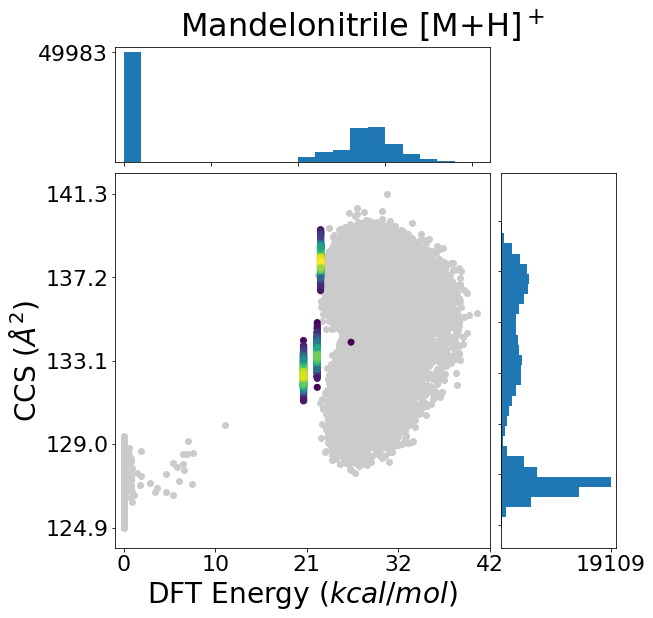

In [6]:
ID = '10'

file_UFF = f'../data/molid{ID}_rdkitUFF_ccs.csv' #RDKit with UFF
file_RDK = f'../data/molid{ID}_rdkit_ccs.csv' #RDKit no UFF
file_DGO = f'../data/molid{ID}_dgo_ccs.csv' #RDKit DFT geom opt

df_UFF = pd.read_csv(file_UFF)
df_RDK = pd.read_csv(file_RDK)
df_DGO = pd.read_csv(file_DGO)

# Set the minimum energy to 0 and scale the rest accordingly.
df_UFF['dft_energy'] *= 627.509 # Convert hartree to kcal/mol 
df_RDK['dft_energy'] *= 627.509 # Convert hartree to kcal/mol 
df_DGO['dft_energy'] *= 627.509 # Convert hartree to kcal/mol 

mn = df_DGO['dft_energy'].min()
df_UFF['dft_energy'] -= mn
df_RDK['dft_energy'] -= mn
df_DGO['dft_energy'] -= mn

df = df_DGO.append(df_RDK)
df = df.append(df_UFF)

x = df['dft_energy']
y = df['ccs']

nullfmt = NullFormatter()

# Define the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]


plt.figure(1, figsize=(8, 8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# Generate color by density
#xy = np.vstack([x,y])
#z = gaussian_kde(xy)(xy)
z = '#cbcbcb'

# the scatter plot:
axScatter.scatter(x, y, c=z)

# Plot again, this time with density for UFF so it stands out
xUFF = df_UFF['dft_energy']
yUFF =df_UFF['ccs']

# Generate color by density
xyUFF = np.vstack([xUFF,yUFF])
zUFF = gaussian_kde(xyUFF)(xyUFF)
#z = 'black'

# the second scatter plot:
axScatter.scatter(xUFF, yUFF, c=zUFF)

binwidth = 0.25

#axScatter.set_xlim((np.min(x)-0.0015,np.max(x)+0.0015))
axScatter.set_xlim((np.min(x)-1,42)) #np.max(x)+1))
axScatter.set_ylim((np.min(y)-1,np.max(y)+1))
axScatter.set_ylabel('CCS ($\AA^2$)', fontsize=28)
axScatter.set_xlabel('DFT Energy ($kcal/mol$)', fontsize=28)

binwidthx = 2
binwidthy = 0.5
binx = np.arange(np.min(x), np.max(x), binwidthx)
biny = np.arange(np.min(y), np.max(y), binwidthy)
hxy, hxx, _ = axHistx.hist(x, bins=binx)
hyy, hyx, _ = axHisty.hist(y, bins=biny, orientation='horizontal')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

# Adjust tick sizes and fonts
axHistx.tick_params(axis='both', which='major', labelsize=22)
axHisty.tick_params(axis='both', which='major', labelsize=22)
axScatter.tick_params(axis='both', which='major', labelsize=22)

axScatter.xaxis.set_major_formatter(FormatStrFormatter('%0.0f'))
axScatter.yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

xtic = np.linspace(np.min(x), 42, 5) #np.max(x), 5)
ytic = np.linspace(np.min(y), np.max(y), 5)
axScatter.set_xticks(xtic)
axScatter.set_yticks(ytic)

axHistx.set_yticks([hxy.max()])
axHisty.set_xticks([hyy.max()])

plt.title(f'Mandelonitrile [M+H]$^+$', fontsize=32, y=1.35, x=-1.2)
#plt.savefig('mandelonitrile-RDkit-UFF.png', dpi=600, bbox_inches='tight')
plt.show()
